# Harmonic Horizons: Mood Detection Across Musical Horizons
Author: Bryan Zhang

## Table of Contents
1. [Introduction](#introduction)
   - [Project Description](#project-description)
   - [Data Description](#data-description)
2. [Acquiring and Loading Data](#acquiring-and-loading-data)
   - [Importing Libraries and Notebook Setup](#importing-libraries-and-notebook-setup)
   - [Loading Data](#loading-data)
   - [Basic Data Exploration](#basic-data-exploration)
3. [Data Preprocessing](#data-preprocessing)
4. [Data Analysis](#data-analysis)
5. [Model Building](#model-building)
6. [Conclusion](#conclusion)
   - [Insights](#insights)
   - [Suggestions](#suggestions)
   - [Possible Next Steps](#possible-next-steps)
---
## Introduction
### Project Description
#### Goal/Purpose
This project focuses on developing an innovative recommendation system that generates personalized playlists based on a user's mood and music preferences. To address the rate limits of Spotify's API, we created a model that classifies Spotify tracks according to specific moods. This notebook offers a detailed analysis of Spotify track features associated with different moods, which serves as the foundation for our mood-based recommendation algorithm.

#### Methodology and Data Source
We will leverage the Spotify API as our primary data source, which offers access to a vast collection of tracks and their associated audio features. Our process involves:
1. Data Collection: Fetching a subset of songs and their audio features from the Spotify API.
2. Feature Engineering: Creating mood labels for tracks, as Spotify doesn't provide this classification directly.
3. Exploratory Data Analysis (EDA): Examining the dataset's characteristics to inform our choice of a classification model.
4. Predictive Modeling: Developing a model to predict mood classifications for future tracks.

### Data Description
#### Content
This dataset is a `.csv` file containing 8,637 data points with 22 columns, each representing different attributes related to a track.

#### Description of Attributes
| Column           | Description                                                                                                                                                                                                                           |
|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| danceability     | Danceability measures a track's suitability for dancing, based on factors like tempo, rhythm stability, and beat strength. It's scored from 0.0 (least danceable) to 1.0 (most danceable).                                            |
| energy           | Energy, scored from 0.0 to 1.0, measures a track's perceived intensity and activity. High-energy tracks are typically fast, loud, and noisy, while low-energy tracks are calmer.                                                      |
| key              | The track's musical key, represented by integers using standard Pitch Class notation.                                                                                                                                                 |
| loudness         | The track's average volume in decibels (dB), typically ranging from -60 to 0 dB.                                                                                                                                                      |
| mode             | Indicates the track's modality. 1 represents major scale, 0 represents minor scale.                                                                                                                                                   |
| speechiness      | Measures spoken word presence in a track, from 0.0 to 1.0. Values above 0.66 indicate speech-dominant audio, 0.33-0.66 suggest a mix of speech and music, and below 0.33 likely represent music with minimal speech.                  |
| acousticness     | Confidence measure from 0.0 to 1.0 indicating how acoustic a track is. 1.0 represents high confidence in the track being acoustic.                                                                                                    |
| instrumentalness | Predicts the absence of vocals in a track, scored from 0.0 to 1.0. Higher values (especially above 0.5) suggest a greater likelihood of no vocal content, excluding "ooh" and "aah" sounds. Rap and spoken word are considered vocal. |
| liveness         | Detects audience presence, indicating the probability of a live performance. Scored from 0.0 to 1.0, with values above 0.8 strongly suggesting a live track.                                                                          |
| valence          | Measures the musical positivity of a track from 0.0 to 1.0. Higher values indicate more positive emotions, while lower values suggest negative emotions                                                                               |
| tempo            | The estimated speed of a track in beats per minute (BPM), derived from the average beat duration.                                                                                                                                     |
| type             | The object type.                                                                                                                                                                                                                      |
| id               | The Spotify ID for the track.                                                                                                                                                                                                         |
| uri              | The Spotify URI for the track.                                                                                                                                                                                                        |
| track_href       | Web API endpoint URL for accessing full track details.                                                                                                                                                                                |
| analysis_url     | Link to the track's full audio analysis, requiring an access token for access.                                                                                                                                                        |
| duration_ms      | Track length in milliseconds.                                                                                                                                                                                                         |
| time_signature   | Estimated meter, ranging from 3 to 7, representing time signatures from 3/4 to 7/4.                                                                                                                                                   |
| name             | The name of the track.                                                                                                                                                                                                                |
| popularity       | A score from 0 to 100, with 100 being most popular. Calculated based on recent play counts, it reflects current popularity rather than historical significance.                                                                       |
| mood             | The labelled mood of the track.                                                                                                                                                                                                       |

#### Acknowledgements
This dataset is provided by the Spotify API.

---
## Acquiring and Loading Data
### Importing Libraries and Notebook Setup
We start by importing the essential libraries required for this analysis. These include Pandas for data manipulation, Seaborn and Matplotlib for data visualization, and Scikit-Learn for its statistical functionalities.





In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import os
import warnings

In [31]:
# Filter Warnings
warnings.filterwarnings("ignore")

### Loading Data
The data used in this notebook is loaded from a separate Python script `make_dataset.py` located in the `data` directory. This script handles:

- Accessing the Spotify API
- Fetching playlists and tracks from the API
- Assigning each track with a corresponding mood

For more details on this process, please refer to the `make_dataset.py` file in the `data` directory.

In [32]:
df = pd.read_csv('/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/data/tracks.csv')

### Basic Data Exploration
#### Initial Inspection
We begin by examining the structure of our dataset, reviewing a sample of its rows, checking the data types of each variable, and identifying the number of duplicate values present in the dataset.


In [33]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
df.head()

Number of rows: 8638
Number of columns: 22


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name,popularity,mood
0,0,0.557,0.540,9,-10.484,1,0.0347,0.0339,0.002480,0.1790,...,audio_features,6dGnYIeXmHdcikdzNNDMm2,spotify:track:6dGnYIeXmHdcikdzNNDMm2,https://api.spotify.com/v1/tracks/6dGnYIeXmHdcikdzNNDMm2,https://api.spotify.com/v1/audio-analysis/6dGnYIeXmHdcikdzNNDMm2,185733,4,Here Comes The Sun - Remastered 2009,85,happy
1,1,0.500,0.704,0,-8.797,1,0.0695,0.1250,0.000018,0.1380,...,audio_features,6XK6Zw6JkFsHXzAcMWNiIr,spotify:track:6XK6Zw6JkFsHXzAcMWNiIr,https://api.spotify.com/v1/tracks/6XK6Zw6JkFsHXzAcMWNiIr,https://api.spotify.com/v1/audio-analysis/6XK6Zw6JkFsHXzAcMWNiIr,263360,4,Send Me On My Way,70,happy
2,2,0.675,0.597,5,-11.329,1,0.0337,0.0534,0.000000,0.0986,...,audio_features,2eF8pWbiivYsYRpbntYsnc,spotify:track:2eF8pWbiivYsYRpbntYsnc,https://api.spotify.com/v1/tracks/2eF8pWbiivYsYRpbntYsnc,https://api.spotify.com/v1/audio-analysis/2eF8pWbiivYsYRpbntYsnc,161160,4,"Signed, Sealed, Delivered (I'm Yours)",36,happy
3,3,0.547,0.820,8,-6.728,1,0.0805,0.2610,0.000000,0.3000,...,audio_features,2Nz6aF1umHh5Et6I5H581L,spotify:track:2Nz6aF1umHh5Et6I5H581L,https://api.spotify.com/v1/tracks/2Nz6aF1umHh5Et6I5H581L,https://api.spotify.com/v1/audio-analysis/2Nz6aF1umHh5Et6I5H581L,172867,4,Hooked On A Feeling,68,happy
4,4,0.526,0.775,0,-6.050,1,0.0352,0.7070,0.000021,0.2170,...,audio_features,3G7tRC24Uh09Hmp1KZ7LQ2,spotify:track:3G7tRC24Uh09Hmp1KZ7LQ2,https://api.spotify.com/v1/tracks/3G7tRC24Uh09Hmp1KZ7LQ2,https://api.spotify.com/v1/audio-analysis/3G7tRC24Uh09Hmp1KZ7LQ2,167373,4,I'm a Believer - 2006 Remaster,76,happy


In [34]:
df.tail()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name,popularity,mood
8633,8633,0.156,0.1270,1,-24.855,0,0.0410,0.915,0.954,0.3720,...,audio_features,00KC6UUY0wFeKxFtMPZjv6,spotify:track:00KC6UUY0wFeKxFtMPZjv6,https://api.spotify.com/v1/tracks/00KC6UUY0wFeKxFtMPZjv6,https://api.spotify.com/v1/audio-analysis/00KC6UUY0wFeKxFtMPZjv6,406675,4,Divine Reception (639hz),35,calm
8634,8634,0.305,0.0803,6,-27.029,1,0.0426,0.915,0.955,0.0963,...,audio_features,5wyxIKlrAELGFJy76n84zK,spotify:track:5wyxIKlrAELGFJy76n84zK,https://api.spotify.com/v1/tracks/5wyxIKlrAELGFJy76n84zK,https://api.spotify.com/v1/audio-analysis/5wyxIKlrAELGFJy76n84zK,343616,4,Lucid Trust (741hz),38,calm
8635,8635,0.146,0.1280,4,-25.668,1,0.0400,0.672,0.951,0.0771,...,audio_features,4bZe10sIeF7PtiMfPwRqs1,spotify:track:4bZe10sIeF7PtiMfPwRqs1,https://api.spotify.com/v1/tracks/4bZe10sIeF7PtiMfPwRqs1,https://api.spotify.com/v1/audio-analysis/4bZe10sIeF7PtiMfPwRqs1,412866,3,Enchanted Waters (852hz),24,calm
8636,8636,0.153,0.0241,11,-26.669,1,0.0384,0.973,0.937,0.1010,...,audio_features,3Ec678tPLOR2zc2vOp1vEP,spotify:track:3Ec678tPLOR2zc2vOp1vEP,https://api.spotify.com/v1/tracks/3Ec678tPLOR2zc2vOp1vEP,https://api.spotify.com/v1/audio-analysis/3Ec678tPLOR2zc2vOp1vEP,456282,3,Silent Communion (963hz),39,calm
8637,8637,0.172,0.0307,5,-31.385,0,0.0464,0.153,0.949,0.1100,...,audio_features,3jdI4Nbl6bW7w3scrJ4P31,spotify:track:3jdI4Nbl6bW7w3scrJ4P31,https://api.spotify.com/v1/tracks/3jdI4Nbl6bW7w3scrJ4P31,https://api.spotify.com/v1/audio-analysis/3jdI4Nbl6bW7w3scrJ4P31,2880000,4,Solfeggio Master (1122hz) [Active Alpha],0,calm


From this initial inspection of the rows, there are no abnormalities in the dataset so far. Regarding the columns, we see that `type`, `id`, `uri`, `analysis_url`, `name`, and `track_href` will not be useful for this analysis, as they do not provide meaningful insights into the data's distribution. These columns will thus be removed at a later preprocessing stage.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8638 entries, 0 to 8637
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8638 non-null   int64  
 1   danceability      8638 non-null   float64
 2   energy            8638 non-null   float64
 3   key               8638 non-null   int64  
 4   loudness          8638 non-null   float64
 5   mode              8638 non-null   int64  
 6   speechiness       8638 non-null   float64
 7   acousticness      8638 non-null   float64
 8   instrumentalness  8638 non-null   float64
 9   liveness          8638 non-null   float64
 10  valence           8638 non-null   float64
 11  tempo             8638 non-null   float64
 12  type              8638 non-null   object 
 13  id                8638 non-null   object 
 14  uri               8638 non-null   object 
 15  track_href        8638 non-null   object 
 16  analysis_url      8638 non-null   object 


#### Check for Duplicate Rows

In [36]:
df['name'].value_counts()

name
The Beach Girl - Latin Jazz                 9
Caribbean Girl - Latin Jazz                 9
If You Were Mine - Latin Jazz               9
The Sound Of The Soul - Latin Jazz          9
Latin For My Caribbean - Latin Jazz         9
                                           ..
Sleepwalker - Slowed                        1
No Signal                                   1
Another Love (Tom Odell) - slowed down      1
PRIDEFUL                                    1
Solfeggio Master (1122hz) [Active Alpha]    1
Name: count, Length: 7841, dtype: int64

### Initial Observations
After this brief overview of the dataset, we see that it contains 22 columns and 8638 rows. One column in particular contains 8637 non-null entries, indicating that a single null value is present in the data, which must be dealt with accordingly. With respect to the columns, their data types appear to be accurate with the type of information that they are displaying. Additionally, the dataset includes numerous duplicate tracks, which will be removed in this following section.

---
## Data Preprocessing
We will begin by addressing many of the issues found in the previous section. We will clean the dataset by removing any null values, dropping unnecessary columns that are irrelevant to this analysis, and eliminating duplicate entries.
### Drop Null Rows

In [37]:
df.dropna(axis=0, how='any', inplace=True)

### Drop Irrelevant Columns

In [38]:
removed_cols = ['Unnamed: 0', 'type', 'uri', 'track_href', 'analysis_url', 'id']
df = df.drop(columns=removed_cols)

### Remove Duplicate Rows

In [39]:
song_counts = df['name'].value_counts()
duplicate_songs = song_counts[song_counts > 1].index
track_df = df[~df['name'].isin(duplicate_songs)]
track_df = track_df.set_index('name')

### Adjust Units
Currently, the `duration_ms` column contains the length of a track in milliseconds, which is difficult to interpret. We shall convert these to seconds to improve readability.

In [40]:
def adjust_time(time):
    return time/1000

track_df['duration_ms'] = track_df['duration_ms'].apply(adjust_time)
track_df = track_df.rename(columns={'duration_ms': 'duration_s'})

---
## Data Analysis
### Univariate Analysis
We are now ready to proceed to the data analysis stage. We will begin by analyzing the distributions of each mood class to help motivate the most effective models to build.

In [41]:
mood_counts = track_df.groupby('mood').count()
mood_counts = mood_counts.assign(counts=mood_counts['danceability'])
mood_counts = mood_counts['counts']
mood_counts

mood
angry    1729
calm     2157
happy    1602
sad      1769
Name: counts, dtype: int64

We see that the distribution of mood classes is relatively balanced. While angry, happy, and sad classes have similar observation counts, the calm class is slightly more prevalent with a total of 2157 observations. Though, this minor imbalance is unlikely to significantly impact model performance.

We continue our analysis by searching for possible skewness present in our data.

In [42]:
mood_means = track_df.groupby('mood').mean()
mood_means

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,popularity
mood,,,,,,,,,,,,,,
angry,0.545571,0.830782,5.155003,-5.735990,0.633314,0.136986,0.073940,0.133290,0.225025,0.464541,128.511619,194.654215,3.957779,40.970503
calm,0.394297,0.158212,4.990264,-23.163197,0.720909,0.060129,0.829115,0.763769,0.137788,0.203365,108.035151,202.223985,3.695410,39.207696
happy,0.662785,0.694895,5.307740,-6.887036,0.649813,0.073182,0.193236,0.073635,0.181139,0.608622,120.974185,209.386398,3.973159,57.885144
sad,0.502589,0.442793,5.055964,-10.721153,0.660825,0.055298,0.513075,0.174364,0.158239,0.320076,117.480967,227.494790,3.840023,43.128886


In [43]:
mood_medians = track_df.groupby('mood').median()
mood_medians

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,popularity
mood,,,,,,,,,,,,,,
angry,0.545,0.8700,5.0,-5.3240,1.0,0.0931,0.0108,0.000051,0.169,0.4630,127.9800,188.3200,4.0,41.0
calm,0.368,0.0981,5.0,-21.6050,1.0,0.0463,0.9240,0.889000,0.110,0.1200,104.0490,162.5930,4.0,44.0
happy,0.677,0.7205,5.0,-6.2285,1.0,0.0487,0.0909,0.000007,0.124,0.6335,120.0785,203.2935,4.0,64.0
sad,0.510,0.4270,5.0,-8.8840,1.0,0.0380,0.5600,0.000073,0.114,0.2930,115.9350,216.0800,4.0,50.0


In [44]:
mood_medians - mood_means

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,popularity
mood,,,,,,,,,,,,,,
angry,-0.000571,0.039218,-0.155003,0.411990,0.366686,-0.043886,-0.063140,-0.133239,-0.056025,-0.001541,-0.531619,-6.334215,0.042221,0.029497
calm,-0.026297,-0.060112,0.009736,1.558197,0.279091,-0.013829,0.094885,0.125231,-0.027788,-0.083365,-3.986151,-39.630985,0.304590,4.792304
happy,0.014215,0.025605,-0.307740,0.658536,0.350187,-0.024482,-0.102336,-0.073628,-0.057139,0.024878,-0.895685,-6.092898,0.026841,6.114856
sad,0.007411,-0.015793,-0.055964,1.837153,0.339175,-0.017298,0.046925,-0.174291,-0.044239,-0.027076,-1.545967,-11.414790,0.159977,6.871114


Based on this table, we see that most predictors show symmetrical distributions with minimal skewness. However, notable exceptions include:

1. `energy` for `calm`: slightly right-skewed
2. `key` for `angry` and `happy`: significantly right-skewed
3. `mode` for all classes: significantly left-skewed
4. `instrumentalness`: some skewness across all classes
5. `duration_s` for `calm`: significantly right-skewed
6. `popularity` for `calm`, `happy`, and `sad`: some skewness present

These asymmetries in distribution may influence our model's performance and thus, must be addressed when training and fitting a model not robust to skewness.

We then continue by observing for any possible outliers.

In [45]:
def find_outliers(df, col, mood):
    current_col = df[df['mood'] == mood][col]
    q1 = current_col.quantile(0.25)
    q3 = current_col.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = current_col[(current_col < lower_bound) | (current_col > upper_bound)]
    
    return outliers
    
def count_outliers(df):
    moods = df['mood'].unique()
    outliers_dicts = {'mood': moods}
    columns = [col for col in df.columns if col not in ['mood']]
    
    for col in columns:
        for mood in moods:
            outliers = find_outliers(df, col, mood)
            num_outliers = outliers.shape[0]
            
            if col not in outliers_dicts:
                outliers_dicts[col] = [num_outliers]
            else:
                outliers_dicts[col].append(num_outliers)
    
    return pd.DataFrame(outliers_dicts)

outlier_counts = count_outliers(track_df)
outlier_counts

,mood,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,popularity
0,happy,13,24,0,73,0,163,90,341,90,0,27,48,53,73
1,sad,6,0,0,121,0,235,0,386,251,21,1,75,292,0
2,angry,0,37,0,56,0,94,231,362,55,0,0,42,87,0
3,calm,0,61,0,0,0,258,250,300,365,66,1,216,97,202


Several predictors exhibit numerous outliers, including:

- `speechiness`
- `acousticness`
- `instrumentalness`
- `liveness`
- `duration_s`
- `time_signature`
- `popularity`

Upon inspection, these outliers appear to represent genuine mood distributions and should be retained. However, their presence may require data transformation or scaling when using models sensitive to outliers during training and testing.

To better visualize predictor distributions, we'll examine their histograms and boxplots. We'll exclude `key`, `time_signature`, and `mode` from these visualizations due to their discrete nature.

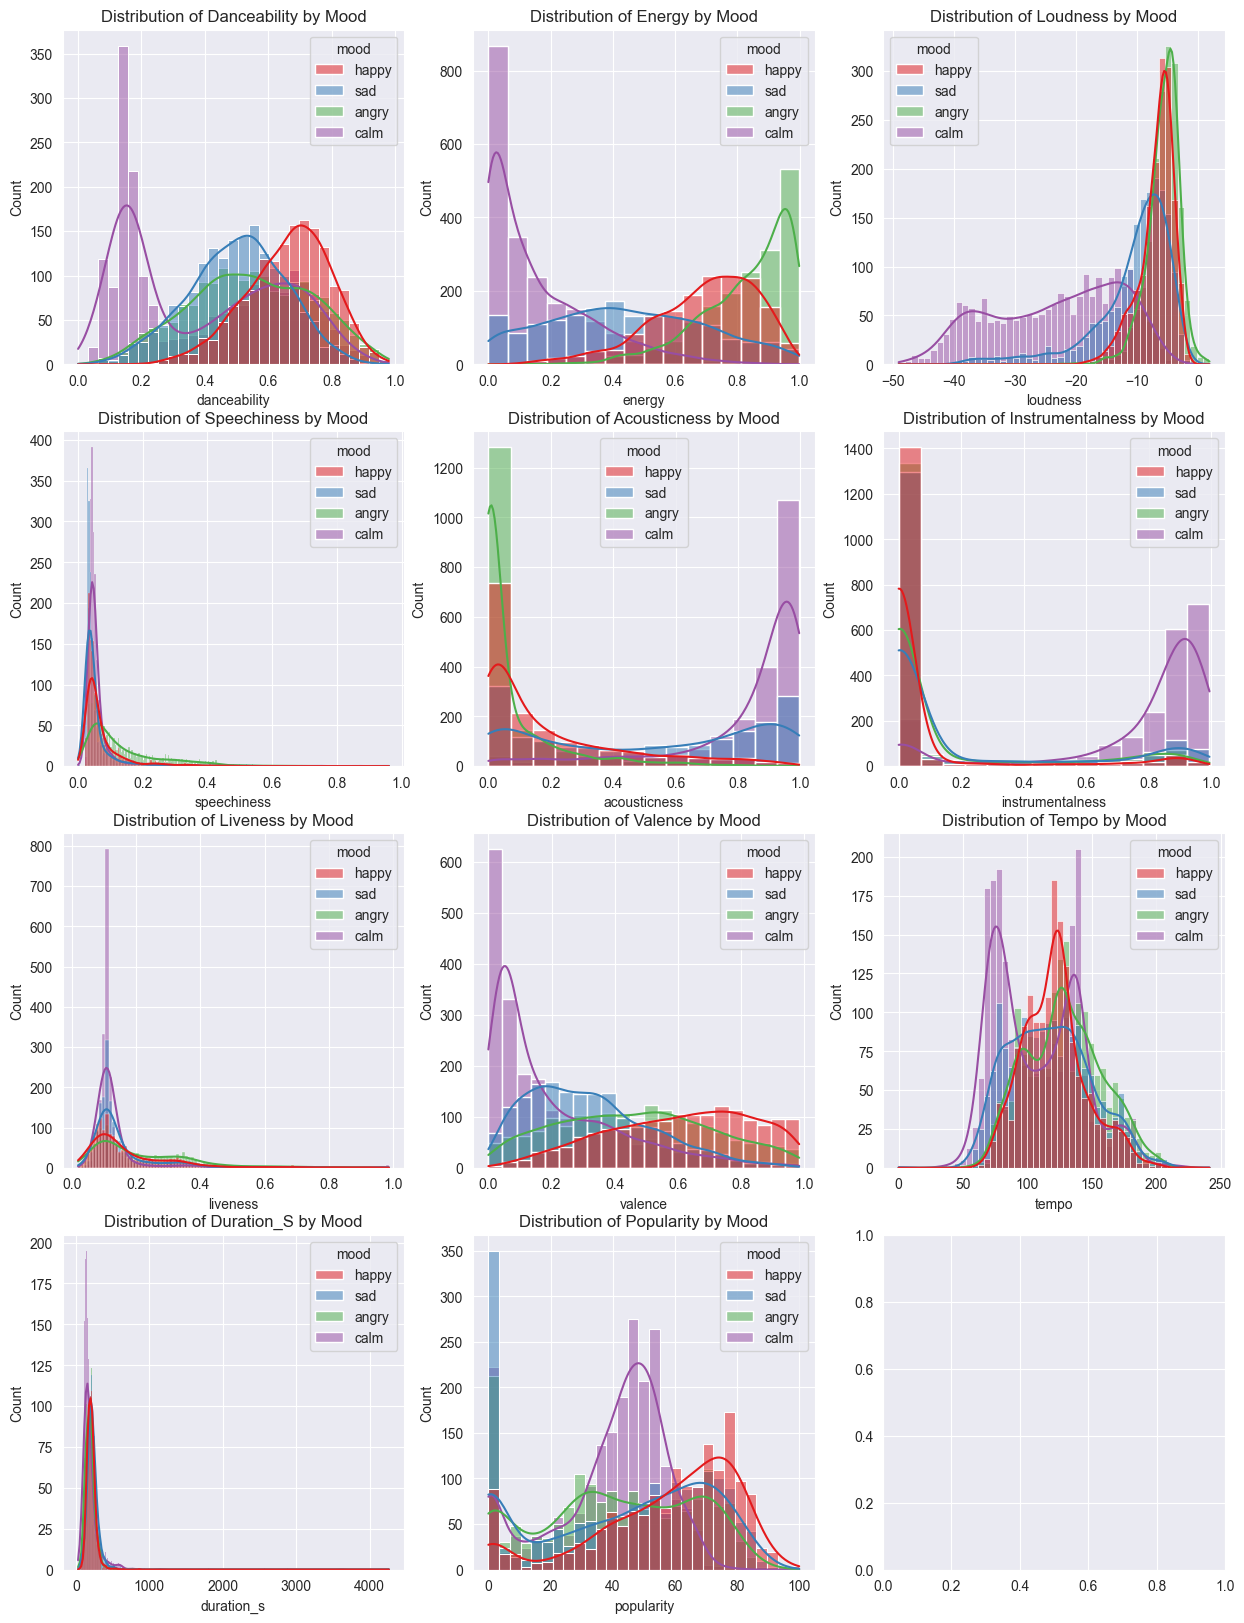

In [46]:
def create_visualization(df, vis_type, **kwargs):
    audio_features = df.drop(columns=['mood', 'key', 'time_signature', 'mode']).columns
    num_features = len(audio_features)
    
    ncols = 3
    nrows = (num_features + 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()

    for i, feature in enumerate(audio_features):
        ax = axes[i]
        vis_type(data=df, x=feature, ax=ax, **kwargs)

        ax.set_title(f'Distribution of {feature.title()} by Mood')
        ax.set_xlabel(feature)

        if vis_type == sns.histplot:
            ax.set_ylabel('Count')
        else:
            ax.set_ylabel('Value')
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

    plt.show()

create_visualization(track_df, sns.histplot, hue='mood', palette='Set1', kde=True)


The histograms reveal several key insights:

1. Features like `danceability`, `liveness`, and `duration_s` show similar distributions across all mood classes.

2. `acousticness`, `energy`, and `loudness` (except for `calm`) display highly skewed distributions towards extreme values.

3. Several predictors approximate Gaussian distributions:
   - `danceability`
   - `loudness` (except `calm`)
   - `tempo` (except `calm`)
   - `speechiness`
   - `liveness`
   - `popularity`
   - `duration_s`

Let's now examine the boxplots for each predictor.

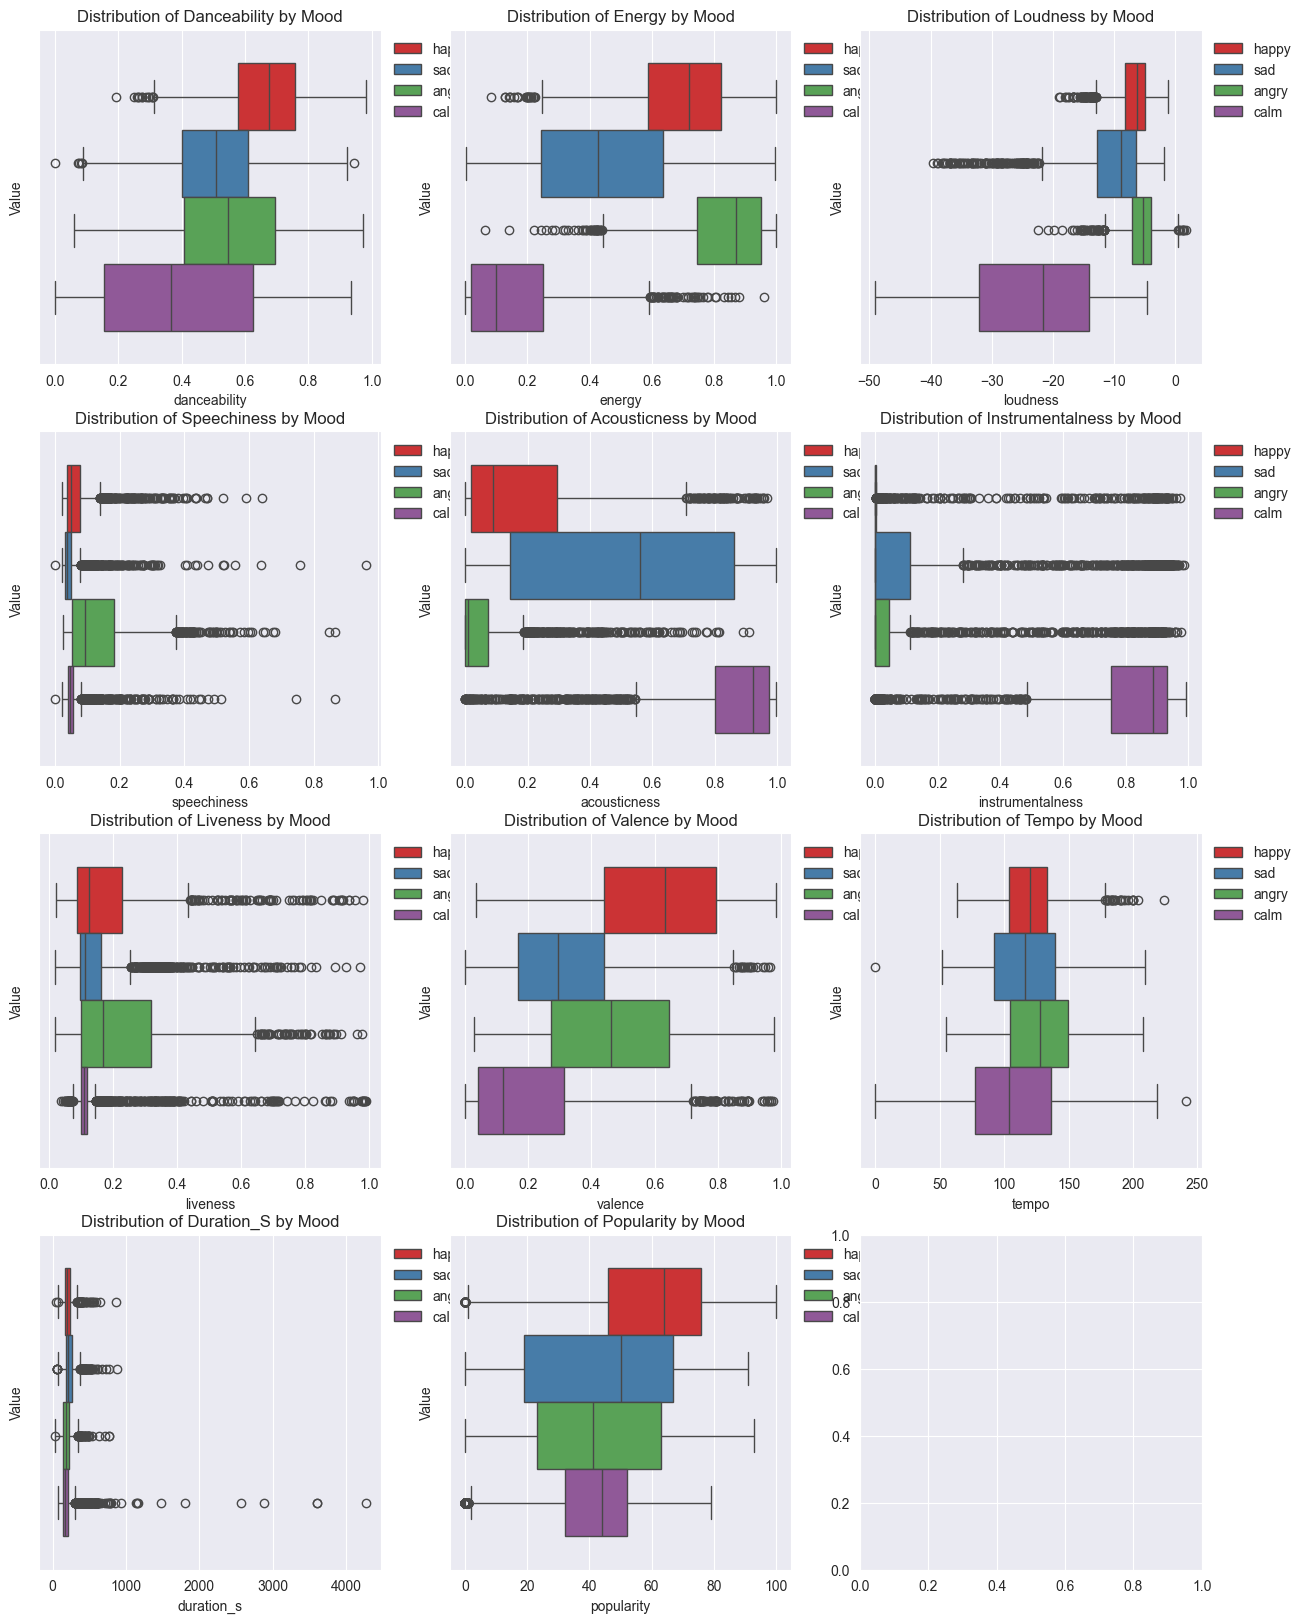

In [47]:
create_visualization(track_df, sns.boxplot, hue='mood', palette='Set1')

The boxplots confirm and expand on our previous observations:

1. Features with the most outliers:
   - `speechiness`
   - `acousticness`
   - `instrumentalness`
   - `liveness`
   - `duration_s`
   - `time_signature`
   - `popularity`

2. Features showing extreme skewness:
   - `acousticness` (except `calm`)
   - `energy`
   - `loudness` (except `calm`)

3. Features with evident class separations:
   - `energy`
   - `acousticness`
   - `valence`

However, other features show less variability between classes, suggesting potential multicollinearity, which needs to be addressed when model building.

Finally, we can analyze the significance of each feature to predicting mood. Performing a One-Way ANOVA yields 

In [48]:
X = track_df.drop(columns=['mood'])
y = track_df['mood']

F_values, P_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': F_values, 'P-Value': P_values})

anova_results.sort_values(by='P-Value', ascending=False)

,Feature,F-Value,P-Value
2,key,2.605094,5.006987e-02
4,mode,13.202303,1.358716e-08
11,duration_s,24.324660,1.175746e-15
12,time_signature,118.588621,5.619814e-75
8,liveness,139.567244,6.446982e-88
10,tempo,150.493685,1.287058e-94
13,popularity,222.930230,2.401904e-138
5,speechiness,431.290268,7.787325e-258
0,danceability,624.920359,0.000000e+00
1,energy,4715.214424,0.000000e+00


The analysis reveals that most variables are statistically significant, as evidenced by their high F-values and low P-values. The key feature stands out as relatively less significant compared to the others.
### Multivariate Analysis
We can begin by analyzing the relationships between each predictor. This can most easily be done by visualizing a correlation matrix, or a heatmap.

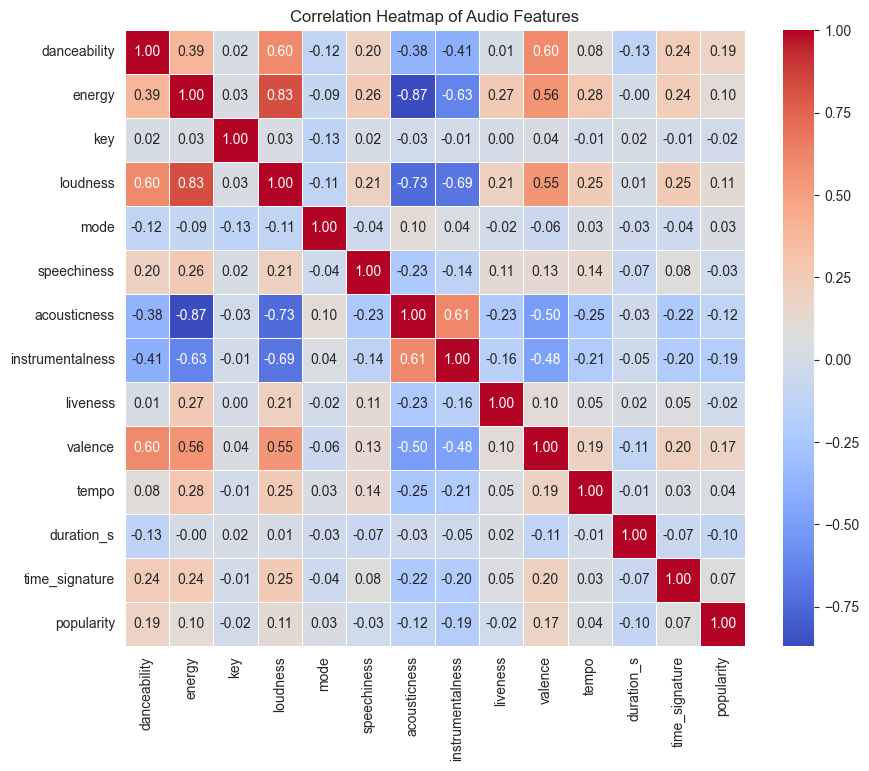

In [49]:
corr_matrix = track_df.drop(columns=['mood']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

The correlation matrix reveals several notable relationships:

1. Strong positive correlations:
   - `energy` vs. `loudness`
   - `valence` vs. `energy`
   - `valence` vs. `loudness`
   - `danceability` vs. `loudness`
   - `valence` vs. `danceability`

2. Strong negative correlations:
   - `acousticness` vs. `energy`
   - `acousticness` vs. `loudness`
   - `instrumentalness` vs. `loudness`
   - `valence` vs. `acousticness`
   - `instrumentalness` vs. `energy`
   - `instrumentalness` vs. `loudness`

These correlations align with intuitive expectations about musical characteristics. For instance:

1. Higher energy tracks tend to be louder.
2. More danceable tracks tend to be louder.
2. More acoustic tracks are typically quieter and less energetic.
3. More positive tracks tend to be more acoustic.

Most other variables show little or weak correlation, indicating minimal influence on each other. We can naturally continue by analyzing the multicolliinearity between feature variables.

In [50]:
X = add_constant(track_df.drop(columns=['mood']))
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.sort_values("VIF", ascending=False)

,Feature,VIF
0,const,171.476979
2,energy,7.307467
4,loudness,5.352006
7,acousticness,4.294417
1,danceability,2.427391
8,instrumentalness,2.091067
10,valence,2.062420
6,speechiness,1.134902
11,tempo,1.115222
9,liveness,1.099691


The table indicates that most predictors do not exhibit multicollinearity. However, `energy` and `loudness` stand out as exceptions, showing signs of collinearity. This makes sense too, as songs that tend to be higher in energy also tend to be more louder.

## Model Building
We are now ready to start building a machine learning model to predict mood classes based on the track's audio features. Some models that we will consider are Logistic Regression including Principal Components Analysis, Linear Discriminant Analysis, Quadratic Discriminant Analysis, a KNN Classifier, and a Naive Bayes' Classifier. We expect either Logistic Regression or Quadratic Discriminant Analysis to perform the best, as the decision boundary is unlikely to be linear based on our previous analysis. We also expect the Naive Bayes' Classifier to perform the worst as we do not expect independence to be satisfied between the predictor variables.

The necessary libraries imported for the process are as follows.
### Importing Libraries

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

### Multinomial Logistic Regression

In [52]:
X = track_df.drop(columns=['mood'])
y = track_df['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression(max_iter=100000)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['saga', 'lbfgs', 'newton-cg', 'sag']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")
best_model.coef_

/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

Best Parameters: {'penalty': None, 'solver': 'lbfgs'}
Accuracy: 74.10%
F1-Score: 72.98%


array([[-1.68568090e-01,  5.16147260e+00, -4.47531398e-03,
        -1.35274848e-02,  3.91199131e-02,  5.99245519e+00,
        -3.06253878e+00, -3.22549212e-02,  4.76879425e-01,
        -6.15655363e-01,  6.61392757e-04, -5.77845154e-03,
        -1.32682347e-01, -5.79009807e-03],
       [-2.80168349e-01, -4.17119638e+00, -1.12954098e-02,
        -3.29010766e-02, -4.84756336e-02, -1.80103805e-01,
         1.46762843e+00,  1.89600737e+00,  4.00343116e-01,
         2.35485371e-01,  6.45736232e-04,  2.06032823e-03,
        -7.78513245e-02, -7.55627803e-03],
       [ 2.46910284e+00,  1.33725056e+00,  1.59595993e-02,
        -1.94287436e-02,  1.52006905e-01, -2.66572573e+00,
         1.73781545e-01, -7.99447025e-01,  1.37904350e-01,
         1.66577536e+00, -3.93880012e-04,  1.84326102e-03,
         2.02511070e-01,  1.68330321e-02],
       [-2.02036640e+00, -2.32752678e+00, -1.88875551e-04,
         6.58573049e-02, -1.42651185e-01, -3.14662566e+00,
         1.42112881e+00, -1.06430542e+00, -1.

### Principal Components Analysis

In [53]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),               
    ('logreg', LogisticRegression(max_iter=100000, class_weight='balanced'))
])

param_grid = {
    'pca__n_components': range(1,15),
    'logreg__penalty': ['l1', 'l2', 'elasticnet', None],       
    'logreg__solver': ['saga', 'lbfgs', 'newton-cg', 'sag'],   
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"F1-Score: {f1*100:.2f}%")
conf_matrix

Best Parameters: {'logreg__penalty': None, 'logreg__solver': 'lbfgs', 'pca__n_components': 14}
Accuracy: 74.45%
F1-Score: 73.42%


array([[296,   1,  54,  20],
       [  4, 364,  11,  38],
       [ 63,  12, 205,  34],
       [ 39,  51,  44, 216]])

### Linear Discriminant Analysis

In [54]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"F1-Score: {f1*100:.2f}%")
conf_matrix

Accuracy: 73.83%
F1-Score: 72.80%


array([[281,   2,  76,  12],
       [  1, 369,  11,  36],
       [ 58,  13, 213,  30],
       [ 41,  53,  47, 209]])

### Quadratic Discriminant Analysis

In [55]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"F1-Score: {f1*100:.2f}%")
conf_matrix

Accuracy: 74.10%
F1-Score: 73.36%


array([[275,   3,  78,  15],
       [  4, 358,  22,  33],
       [ 44,  11, 239,  20],
       [ 35,  40,  71, 204]])

### K-Nearest Neighbors Classifier

In [56]:
# KNN
X = track_df.drop(columns=['mood', 'key', 'time_signature', 'liveness', 'tempo'])
y = track_df['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_neighbors': range(1, 31)
}

knn = KNeighborsClassifier(weights='distance')

grid_search = GridSearchCV(estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"F1-Score: {f1*100:.2f}%")
conf_matrix

Best parameters: {'n_neighbors': 20}
Accuracy: 76.86%
F1-Score: 76.03%


array([[297,   3,  59,  12],
       [  2, 367,   9,  39],
       [ 49,  13, 217,  35],
       [ 31,  40,  44, 235]])

In [59]:
X.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'valence', 'duration_s',
       'popularity'],
      dtype='object')

### Naive Bayes Classifier

In [57]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"F1-Score: {f1*100:.2f}%")
conf_matrix

Accuracy: 72.73%
F1-Score: 71.59%


array([[289,   2,  68,  12],
       [  3, 358,  12,  44],
       [ 62,   8, 227,  17],
       [ 48,  53,  67, 182]])

### Save Best Model

In [58]:
directory = '/harmonic_horizons/src/models'

model_path = os.path.join(directory, 'best_knn_model.pkl')
scaler_path = os.path.join(directory, 'scaler.pkl')

joblib.dump(best_knn, model_path)
joblib.dump(scaler, scaler_path)

['/Users/bryanzhang/Desktop/career/projects/harmonic_horizons/src/models/scaler.pkl']

Based on the model performance, the ranking from best to worst, in regard to F1-Score, is:

1. K-Nearest Neighbors
2. Logistic Regression
3. Quadratic Discriminant Analysis (QDA)
4. Linear Discriminant Analysis (LDA)
5. Naive Bayes classifier

Based on these results, K-Nearest Neighbors (KNN) clearly performs the best achieving the highest F1-Score of 76.03%, suggesting that our data follows a highly nonlinear and complex decision boundary. This strong performance is likely due to the use of backward selection, which eliminated less useful variables and lowering the risk of the curse of dimensionality. Additionally, the skewed distributions of many predictors likely contributed to its predictive power, as models like LDA, QDA, and Naive Bayes assume Gaussian distributions, which was not satisfied with some of the predictors.

Logistic Regression's performance is also noteworthy. Its best hyperparameters, identified through GridSearch, involved no regularization (e.g., lasso or ridge), indicating that multicollinearity does not significantly affect its predictive strength. It also suggests that the model is not overfitting to noise or irrelevant patterns in the data.

The similar performance of LDA and QDA likely reflects the complexity of the decision boundary, which cannot fully capture the variability of the data with just a linear or quadratic decision boundary. Finally, Naive Bayes performed the worst, as expected, as the predictors do not satisfy the independence condition required for this model.

---
## Conclusion
### Insights
During both exploratory data analysis and model building, we encountered several key insights. Notably, many predictors like `speechiness`, `acousticness`, and `instrumentalness` had numerous outliers, and several, including `acousticness`, `energy`, and `loudness`, displayed strong skewness in their corresponding distributions. Most predictors, except for `key`, were also shown to be significant to their predictive capabilities.. 

In multivariate analysis, we primarily observed correlations between variables, such as the positive correlation between `energy` and `loudness`, and the negative correlation between `energy` and `acousticness`. By calculating VIF values, we also identified slight multicollinearity between `energy` and `loudness`. These issues are to be addressed during model building by scaling the data and removing unnecessary predictors.

When it came to model building, it was discovered that the class decision boundaries are highly nonlinear and complex. Furthermore, despite the presence of multicollinearity between `energy` and `loudness`, it did not affect the model's predictive power significantly as expected.
### Suggestions
The current data collection process may include inaccuracies, as it relies on the assumption that Spotify users correctly categorized each song in the playlists. This assumption can fail due to human error and also due to significant class overlap, as many tracks exhibit similar properties.

### Possible Next Steps
In future iterations, refining data collection by labeling songs based solely on their audio features could improve accuracy and enhance model performance by reducing bias from human error. Collecting more data would capture greater class variability, while feature engineering, such as incorporating track lyrics, could further enhance predictions. Additionally, exploring other machine learning methods, including ensemble techniques and deep learning, could provide more insightful results.